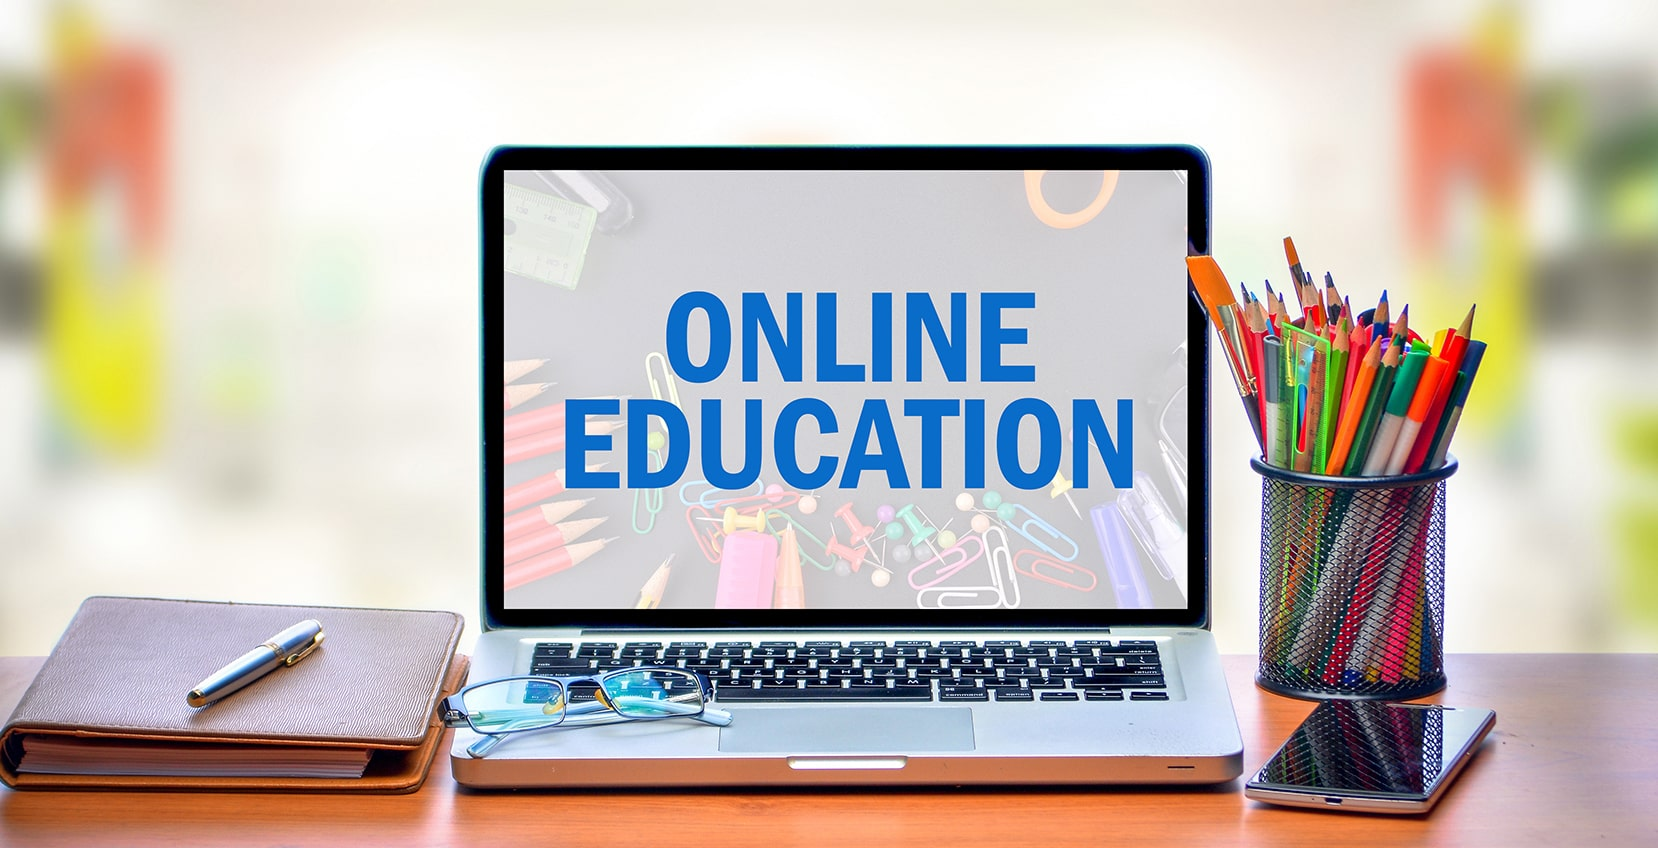

### Effectiveness of online education:
* The effectiveness of online education has shown a number of advantages due to increased flexibility and learning opportunities: easy access to experts, exposure to educational environments, a wide range of types of courses, and joining student communities.
* Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of Students’ Adaptability Level Prediction in Online Education using Machine Learning Approaches

# Importing Libraries And Loading the Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
data = pd.read_csv('students_adaptability_level_online_education.csv')

# Data Information:

In [3]:
data.shape

(1205, 11)

In [4]:
data.head(10)

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low
5,School,Private,Male,11,Mobile,No,Town,Poor,Mobile Data,3G,Low
6,School,Private,Male,11,Mobile,No,Town,Mid,Wifi,4G,Low
7,School,Private,Male,11,Mobile,No,Town,Mid,Wifi,4G,Moderate
8,College,Public,Male,18,Mobile,No,Town,Mid,Wifi,4G,Low
9,School,Private,Male,11,Mobile,No,Town,Mid,Mobile Data,3G,Moderate


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   int64 
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB


In [6]:
data.columns

Index(['Education Level', 'Institution Type', 'Gender', 'Age', 'Device',
       'IT Student', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'Flexibility Level'],
      dtype='object')

In [7]:
data.nunique()

Education Level        3
Institution Type       2
Gender                 2
Age                    6
Device                 3
IT Student             2
Location               2
Financial Condition    3
Internet Type          2
Network Type           3
Flexibility Level      3
dtype: int64

# Checking the Missing Data in Dataset:

In [8]:
# Checking for null values in training dataset
missing = pd.DataFrame(data.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(data)).round(2)*100
missing

,no.of missing values,% missing_values
Education Level,0,0.0
Institution Type,0,0.0
Gender,0,0.0
Age,0,0.0
Device,0,0.0
IT Student,0,0.0
Location,0,0.0
Financial Condition,0,0.0
Internet Type,0,0.0
Network Type,0,0.0


<AxesSubplot:>

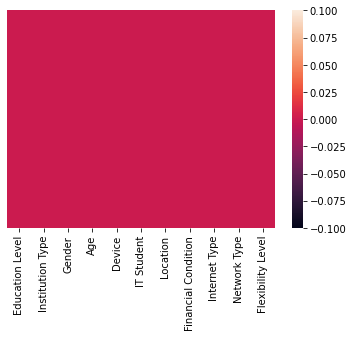

In [9]:
#Also using heatmap find null values
sns.heatmap(data.isnull(),yticklabels = False)

# Exploratary data analysis:

In [10]:
data.describe()

,Age
count,1205.000000
mean,17.065560
std,5.830369
min,9.000000
25%,11.000000
50%,18.000000
75%,23.000000
max,27.000000


In [11]:
correlation = data.corr()
correlation

,Age
Age,1.0


<AxesSubplot:xlabel='Education Level', ylabel='count'>

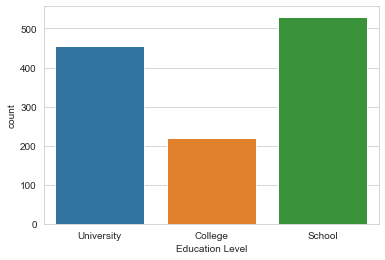

In [12]:
sns.set_style('whitegrid')
sns.countplot(data['Education Level'])

<AxesSubplot:xlabel='Institution Type', ylabel='count'>

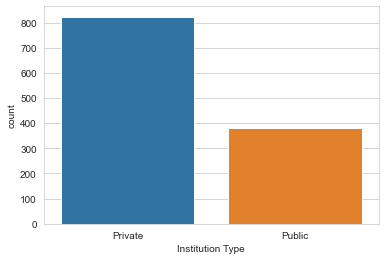

In [13]:
sns.set_style('whitegrid')
sns.countplot(data['Institution Type'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

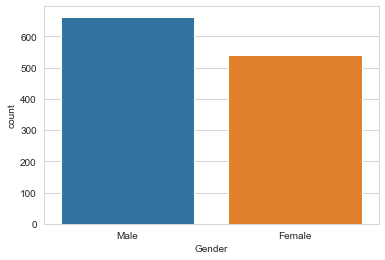

In [14]:
sns.set_style('whitegrid')
sns.countplot(data['Gender'])

<AxesSubplot:xlabel='Device', ylabel='count'>

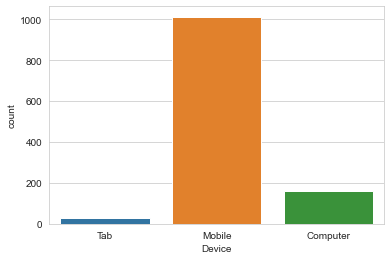

In [15]:
sns.set_style('whitegrid')
sns.countplot(data['Device'])

<AxesSubplot:xlabel='IT Student', ylabel='count'>

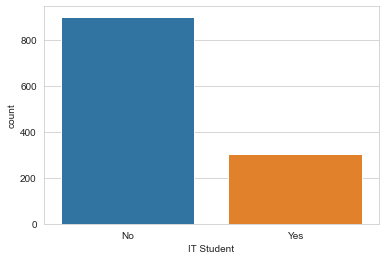

In [16]:
sns.set_style('whitegrid')
sns.countplot(data['IT Student'])

<AxesSubplot:xlabel='Location', ylabel='count'>

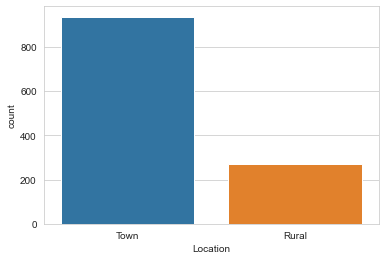

In [17]:
sns.set_style('whitegrid')
sns.countplot(data['Location'])

<AxesSubplot:xlabel='Financial Condition', ylabel='count'>

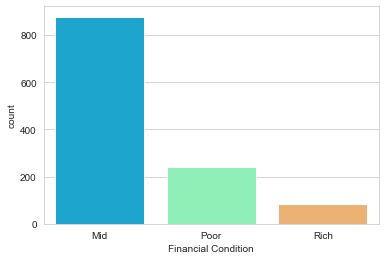

In [18]:
sns.set_style('whitegrid')
sns.countplot(data['Financial Condition'],palette = 'rainbow')

<AxesSubplot:xlabel='Internet Type', ylabel='count'>

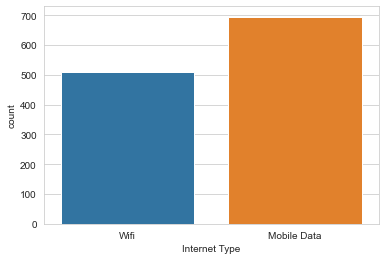

In [19]:
sns.set_style('whitegrid')
sns.countplot(data['Internet Type'])

<AxesSubplot:xlabel='Network Type', ylabel='count'>

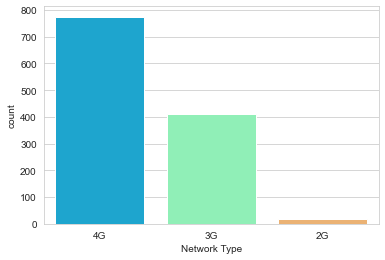

In [20]:
sns.set_style('whitegrid')
sns.countplot(data['Network Type'],palette = 'rainbow')

<AxesSubplot:xlabel='Flexibility Level', ylabel='count'>

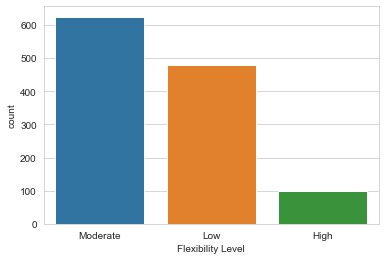

In [21]:
sns.set_style('whitegrid')
sns.countplot(data['Flexibility Level'])

<AxesSubplot:xlabel='Age'>

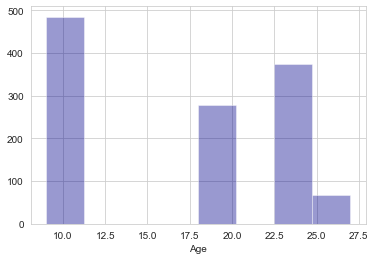

In [22]:
sns.distplot(data['Age'],kde = False,color = 'Darkblue')

<AxesSubplot:xlabel='Age', ylabel='Density'>

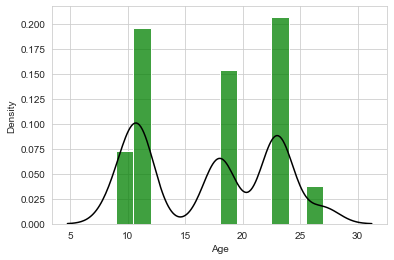

In [23]:
sns.histplot(data["Age"], stat='density',color='green')
sns.kdeplot(data["Age"], color='black')

# Apply log transformation to the attribute Age:

<AxesSubplot:xlabel='AgeLog', ylabel='Density'>

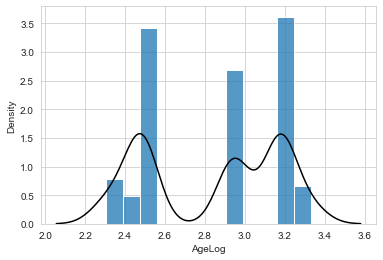

In [24]:
data['AgeLog'] = np.log(data['Age']+1)
sns.histplot(data["AgeLog"], stat='density')
sns.kdeplot(data["AgeLog"], color='black')

<AxesSubplot:xlabel='Age'>

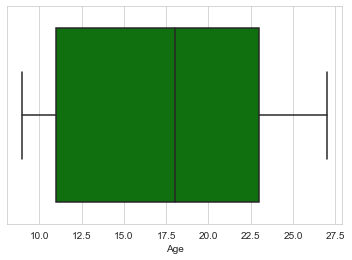

In [25]:
sns.boxplot(data['Age'],color = 'green')

In [26]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [27]:
FlexibilityLevel = enc.fit_transform(data['Flexibility Level'])

In [28]:
data['Flexibility Level'] = FlexibilityLevel 

# Relation between categorical column and target columns:¶

In [29]:
categorical_features = ['Education Level','Gender','Institution Type','Device','IT Student','Location','Financial Condition','Internet Type','Network Type']

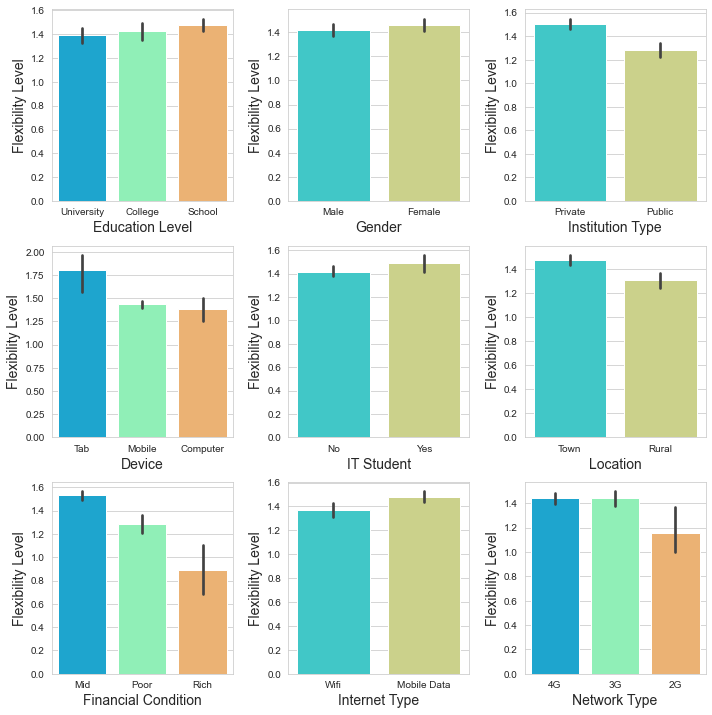

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'Flexibility Level'

for i, c in enumerate(categorical_features):
    sns.barplot(data[c], data[target], ax=axes[i],palette = 'rainbow')
    axes[i].set_ylabel('Flexibility Level', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
    
plt.tight_layout()
plt.show()

# Label Encoding:

In [31]:
EducationLevel= enc.fit_transform(data['Education Level'])
Gender = enc.fit_transform(data['Gender'])
InstitutionType = enc.fit_transform(data['Institution Type'])
Device = enc.fit_transform(data['Device'])
ITStudent= enc.fit_transform(data['IT Student'])
Location = enc.fit_transform(data['Location'])
FinancialCondition = enc.fit_transform(data['Financial Condition'])
InternetType = enc.fit_transform(data['Internet Type'])
NetworkType = enc.fit_transform(data['Network Type'])

In [32]:
data['Education Level'] = EducationLevel
data['Gender'] = Gender
data['Institution Type'] = InstitutionType
data['Device'] = Device 
data['IT Student'] = ITStudent
data['Location'] = Location
data['Financial Condition'] = FinancialCondition
data['Internet Type'] = InternetType
data['Network Type'] = NetworkType

In [33]:
data

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level,AgeLog
0,2,0,1,23,2,0,1,0,1,2,2,3.178054
1,2,0,0,23,1,0,1,0,0,2,2,3.178054
2,0,1,0,18,1,0,1,0,1,2,2,2.944439
3,1,0,0,11,1,0,1,0,0,2,2,2.484907
4,1,0,0,18,1,0,1,1,0,1,1,2.944439
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0,0,0,18,1,0,1,0,1,2,1,2.944439
1201,0,0,0,18,1,0,0,0,1,2,2,2.944439
1202,1,0,1,11,1,0,1,0,0,1,2,2.484907
1203,0,0,0,18,1,0,0,0,1,2,1,2.944439


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education Level      1205 non-null   int32  
 1   Institution Type     1205 non-null   int32  
 2   Gender               1205 non-null   int32  
 3   Age                  1205 non-null   int64  
 4   Device               1205 non-null   int32  
 5   IT Student           1205 non-null   int32  
 6   Location             1205 non-null   int32  
 7   Financial Condition  1205 non-null   int32  
 8   Internet Type        1205 non-null   int32  
 9   Network Type         1205 non-null   int32  
 10  Flexibility Level    1205 non-null   int32  
 11  AgeLog               1205 non-null   float64
dtypes: float64(1), int32(10), int64(1)
memory usage: 66.0 KB


# Splitting the Data into Train and Test:

In [35]:
x = data.drop('Flexibility Level',axis=1)

In [36]:
x.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,AgeLog
0,2,0,1,23,2,0,1,0,1,2,3.178054
1,2,0,0,23,1,0,1,0,0,2,3.178054
2,0,1,0,18,1,0,1,0,1,2,2.944439
3,1,0,0,11,1,0,1,0,0,2,2.484907
4,1,0,0,18,1,0,1,1,0,1,2.944439


In [37]:
y = data['Flexibility Level']
y

0       2
1       2
2       2
3       2
4       1
       ..
1200    1
1201    2
1202    2
1203    1
1204    2
Name: Flexibility Level, Length: 1205, dtype: int32

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.25,random_state=42)

# Model Training:

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [40]:
dt.fit(x_train ,y_train)

DecisionTreeClassifier()

In [41]:
dt.feature_importances_

array([0.12480898, 0.0868278 , 0.09438097, 0.08179098, 0.04680326,
       0.05563336, 0.11101128, 0.13885017, 0.05215881, 0.10834287,
       0.0993915 ])

In [42]:
x_train.columns

Index(['Education Level', 'Institution Type', 'Gender', 'Age', 'Device',
       'IT Student', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'AgeLog'],
      dtype='object')

In [43]:
y_pred=dt.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(y_test,y_pred)
ac_dt

0.8245033112582781

[Text(0.5559275793650794, 0.9642857142857143, 'X[1] <= 0.5\ngini = 0.558\nsamples = 903\nvalue = [69, 353, 481]'),
 Text(0.36086309523809523, 0.8928571428571429, 'X[7] <= 1.5\ngini = 0.525\nsamples = 617\nvalue = [53, 185, 379]'),
 Text(0.2534722222222222, 0.8214285714285714, 'X[7] <= 0.5\ngini = 0.502\nsamples = 578\nvalue = [32, 183, 363]'),
 Text(0.12003968253968254, 0.75, 'X[0] <= 0.5\ngini = 0.452\nsamples = 444\nvalue = [16, 124, 304]'),
 Text(0.031746031746031744, 0.6785714285714286, 'X[6] <= 0.5\ngini = 0.524\nsamples = 70\nvalue = [2, 37, 31]'),
 Text(0.015873015873015872, 0.6071428571428571, 'X[8] <= 0.5\ngini = 0.391\nsamples = 30\nvalue = [0, 22, 8]'),
 Text(0.007936507936507936, 0.5357142857142857, 'gini = 0.444\nsamples = 12\nvalue = [0, 8, 4]'),
 Text(0.023809523809523808, 0.5357142857142857, 'gini = 0.346\nsamples = 18\nvalue = [0, 14, 4]'),
 Text(0.047619047619047616, 0.6071428571428571, 'X[4] <= 0.5\ngini = 0.526\nsamples = 40\nvalue = [2, 15, 23]'),
 Text(0.039682539

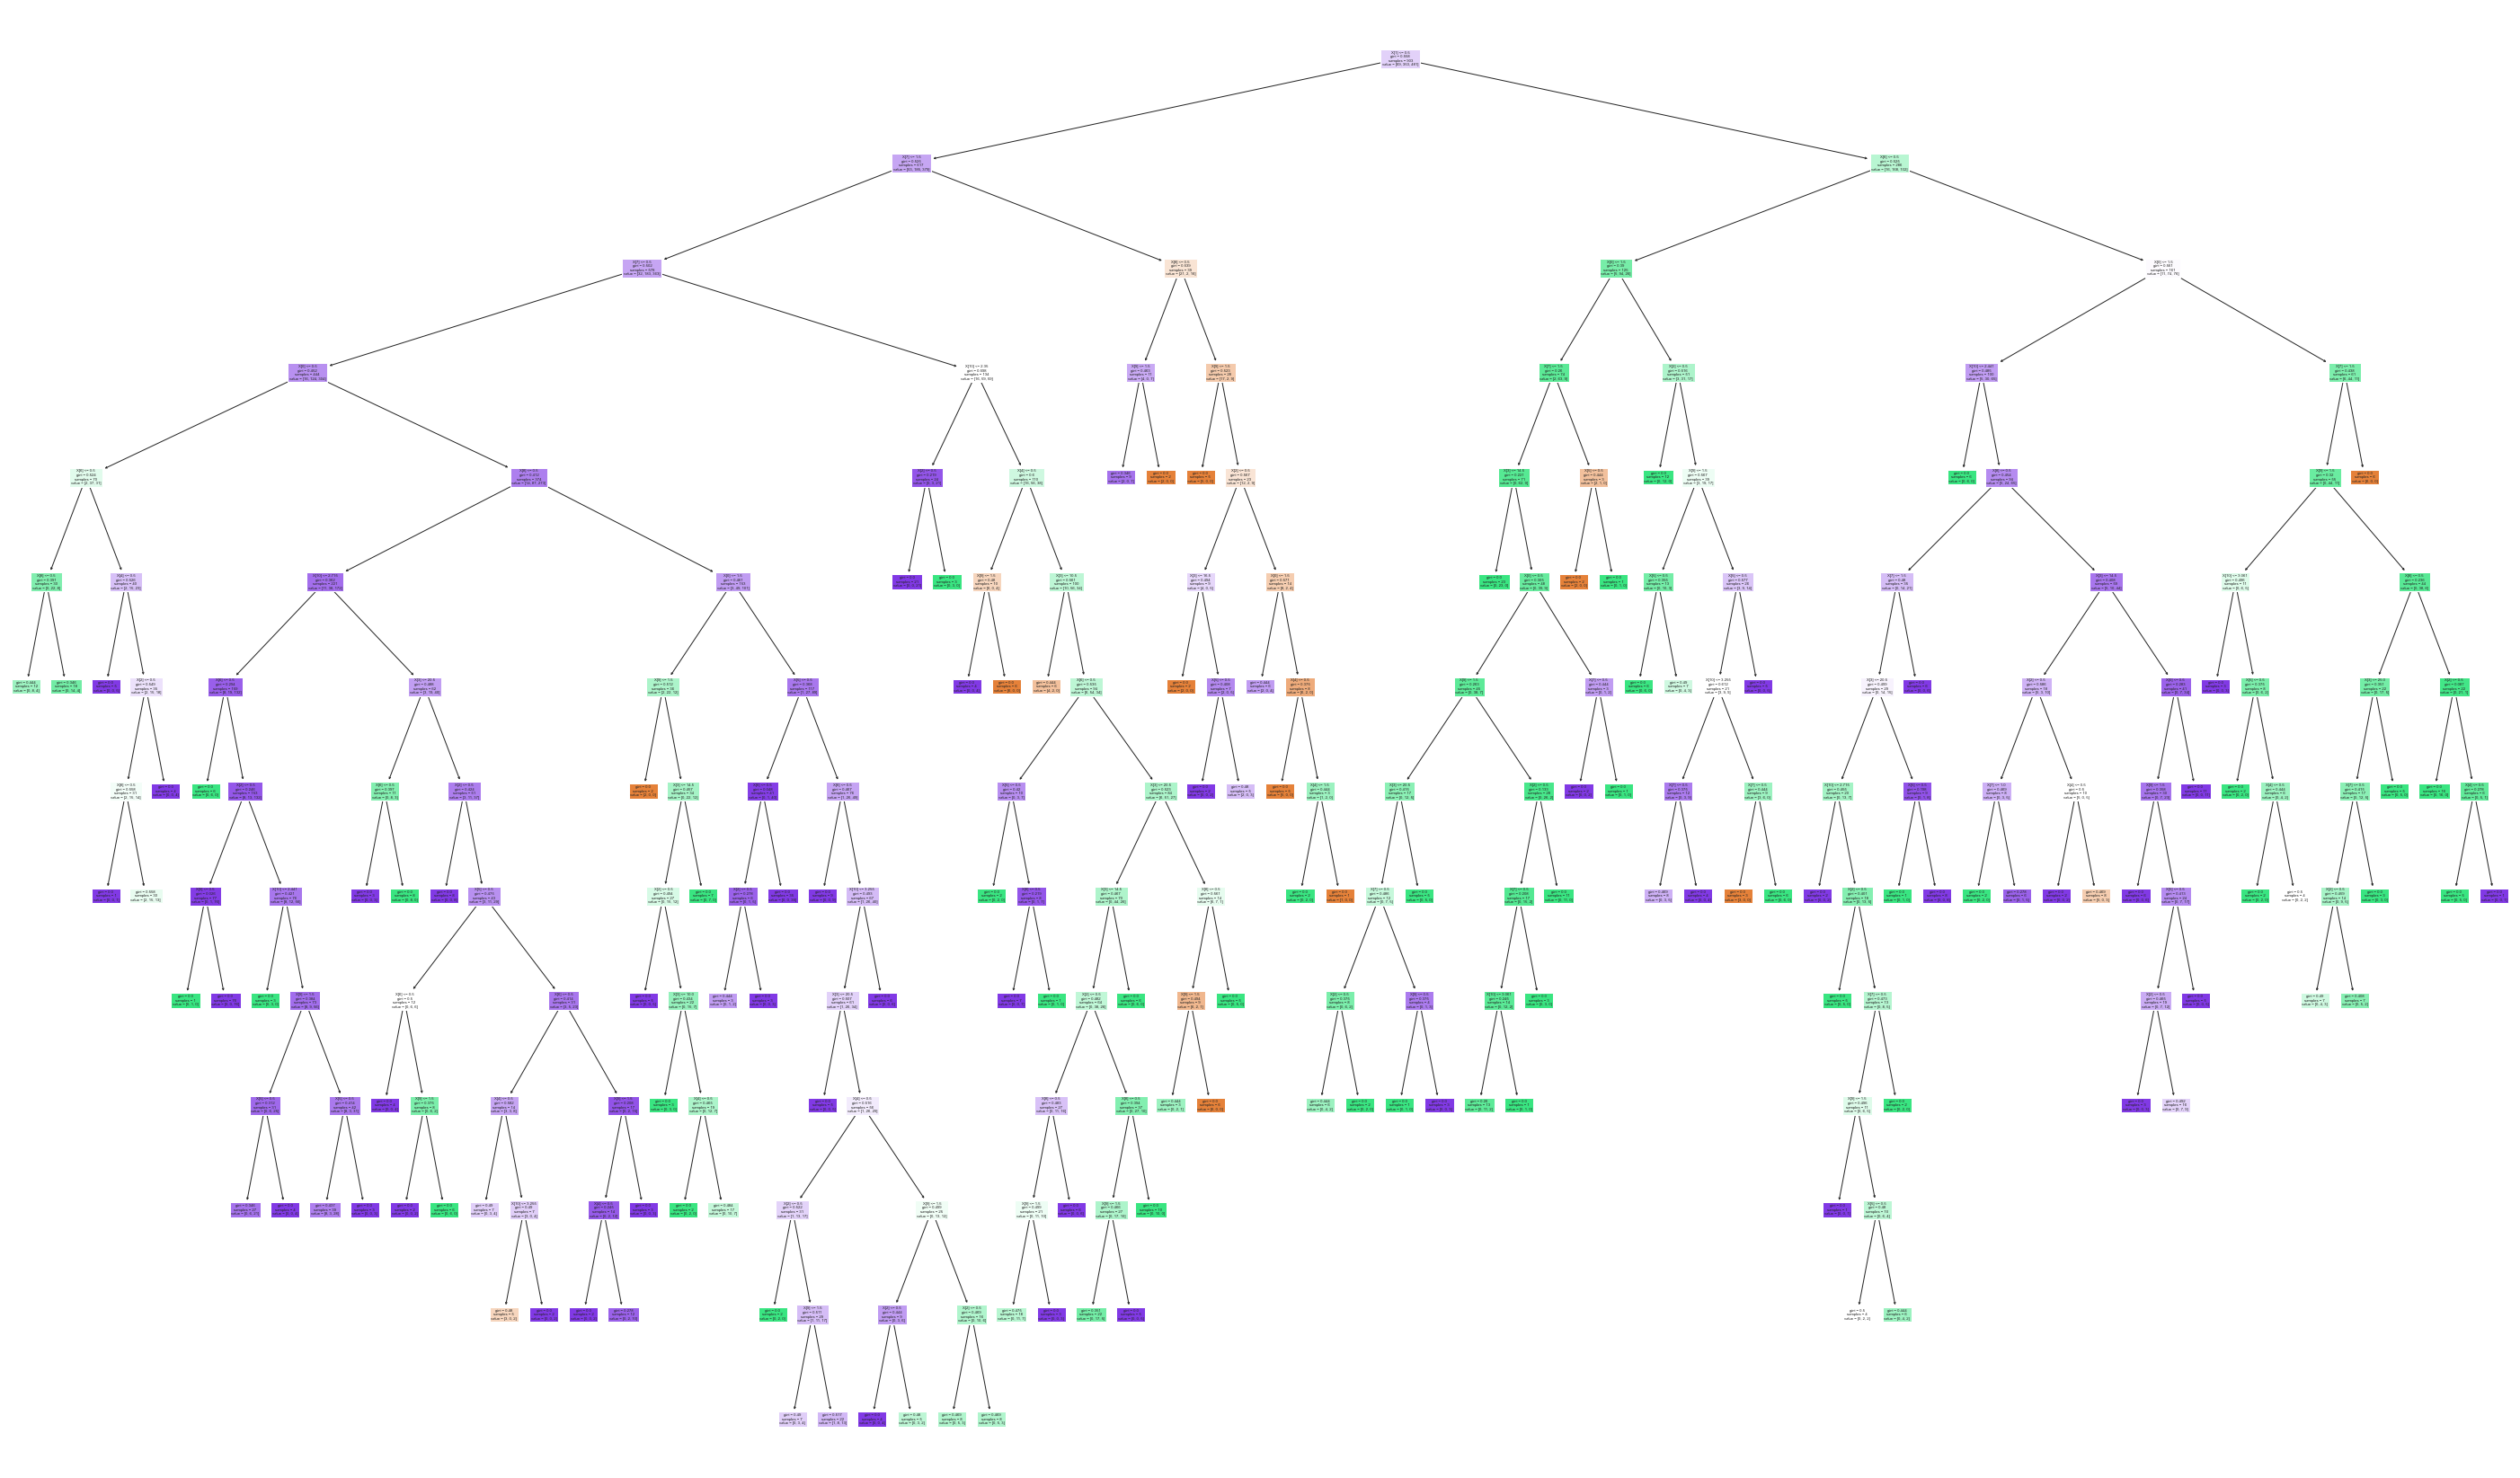

In [45]:
from sklearn import tree
plt.figure(figsize=(50,30))
tree.plot_tree(dt,filled=True)

# Applying Hyperparameter Tuning:

In [46]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [47]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =2, verbose=1)

In [48]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [49]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}


In [50]:
grid_search.best_score_

0.798465316144874

In [51]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 25, min_samples_leaf= 1, min_samples_split= 2, splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=25)

In [52]:
ac2_clf= clf.score(x_test ,y_test)
ac2_clf

0.8245033112582781

Text(0.5, 1.03, 'Confusion Matrix for Decision Tree')

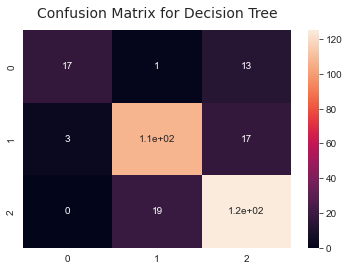

In [88]:
# Confusion matrix for SVM
from sklearn.metrics import confusion_matrix

y_pred_clf = clf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_clf)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Decision Tree", fontsize=14, fontname="DejaVu Sans", y=1.03)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        31
           1       0.77      0.67      0.71       127
           2       0.70      0.79      0.74       144

    accuracy                           0.72       302
   macro avg       0.70      0.68      0.69       302
weighted avg       0.72      0.72      0.72       302



# RandomForest Classification Algorithm:

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [54]:
rf.fit(x_train ,y_train)

RandomForestClassifier()

In [55]:
rf.feature_importances_

array([0.07730031, 0.0904858 , 0.11323943, 0.09025823, 0.06075858,
       0.06753113, 0.08440541, 0.15386883, 0.08204346, 0.08521267,
       0.09489614])

In [56]:
y_pred=rf.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score
ac_rf=accuracy_score(y_test,y_pred)
ac_rf

0.8311258278145696

Text(0.5, 1.03, 'Confusion Matrix for RandomForest Classifier')

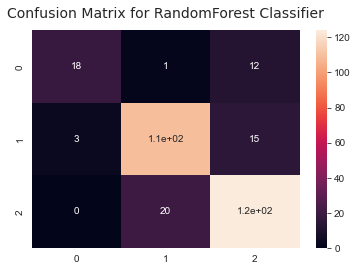

In [89]:
# Confusion matrix for SVM
from sklearn.metrics import confusion_matrix

y_pred_rf = rf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for RandomForest Classifier", fontsize=14, fontname="DejaVu Sans", y=1.03)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        31
           1       0.77      0.67      0.71       127
           2       0.70      0.79      0.74       144

    accuracy                           0.72       302
   macro avg       0.70      0.68      0.69       302
weighted avg       0.72      0.72      0.72       302



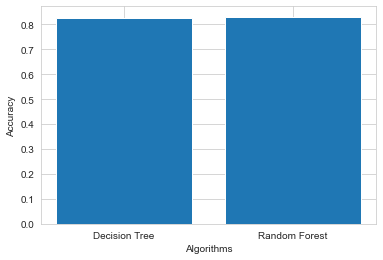

In [92]:
plt.bar(['Decision Tree','Random Forest'],[ac2_clf,ac_rf])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()